# SMC-ABC Lotka–Volterra example

In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2)
data = np.random.normal(loc=0, scale=1, size=1000)

/home/agustina/Documents/pymc3/pymc3/step_methods/smc_ABC.py:79: UserWarning: Warning: SMC-ABC methods are experimental step methods and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)


# Lotka–Volterra
In this example we will try to find parameters for the Lotka-Volterra equations. A common competition model for describing how the number of individuals of each species changes when more than one species uses the same resource (Otto, Day, 2007).

In [2]:
from scipy.integrate import odeint

In [3]:
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75

X0 = [10., 5.]
size = 1000
time = 15
t = np.linspace(0, time, size)

def dX_dt(X, t, a, b, c, d):
    """ Return the growth rate of fox and rabbit populations. """

    return np.array([ a*X[0] -   b*X[0]*X[1] , 
                  -c*X[1] + d*b*X[0]*X[1] ])

In [4]:
def simulate(a, b, c, d): 
    return odeint(dX_dt, y0=X0, t=t, rtol=0.1, args=(a, b, c, d))

In [5]:
def add_noise(a, b, c, d):
    noise = np.random.normal(size=(size, 2))
    simulated = simulate(a, b, c, d)
    simulated += noise
    indexes = np.sort(np.random.randint(low=0, high=size, size=size))    
    return simulated[indexes]

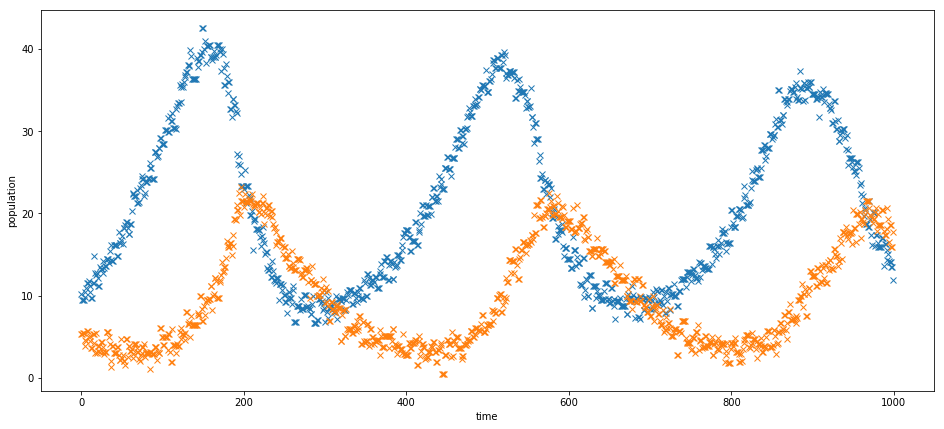

In [6]:
observed = add_noise(a, b, c, d )
_, ax = plt.subplots(figsize=(16,7))
ax.plot(observed, 'x')
ax.set_xlabel('time')
ax.set_ylabel('population');

In [11]:
with pm.Model() as model:
    a = pm.HalfNormal('a', 1, transform=None)
    b = pm.HalfNormal('b', 1, transform=None)
    c = pm.HalfNormal('c', 1, transform=None)
    d = pm.HalfNormal('d', 1, transform=None)
    simulator = pm.Simulator('simulator', simulate, observed=observed)
    trace = pm.sample(step=pm.SMC_ABC(n_steps=50, min_epsilon=70, iqr_scale=3, sum_stat=['mean', 'var']), draws=500)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [12]:
pm.traceplot(trace);

NameError: name 'trace' is not defined

NameError: name 'trace' is not defined

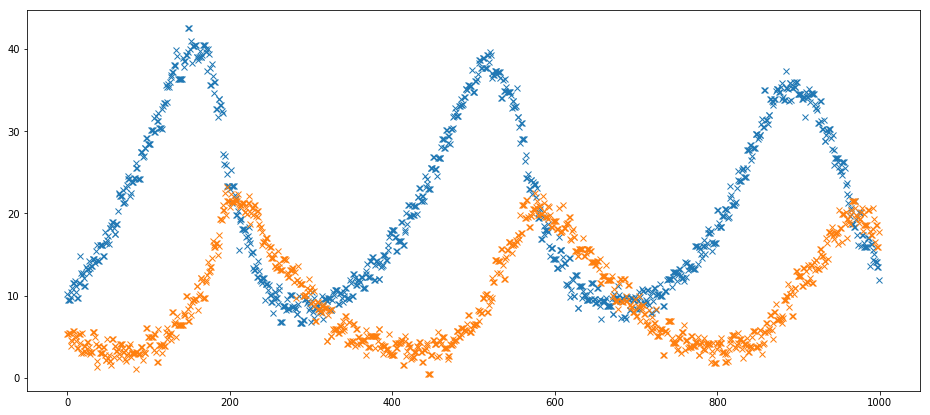

In [13]:
_, ax = plt.subplots(figsize=(16,7))
ax.plot(observed, 'x')
ax.plot(simulate(trace['a'].mean(), trace['b'].mean(), trace['c'].mean(), trace['d'].mean()))
ax.set_xlabel('time')
ax.set_ylabel('population');

In [ ]:
pm.summary(trace)